# Módulo 6 · Métricas de desempeño de un modelo
**Análisis de caso – AutoPredict S.A. - Hans Contreras**

Se construye un modelo de **regresión lineal** para estimar el **Precio** de venta de vehiculos usados a partir de datos como la **Antigüedad**, **Kilometraje** y **Puertas**; se divide el set en **train/test (≈80/20 → 3/1)**, se calculan **MAE, MSE, RMSE y R²**, y se grafica *real vs. predicho*.

In [20]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.DataFrame({
    "ID": [1, 2, 3, 4],
    "Antiguedad": [5, 3, 7, 2],
    "Kilometraje": [50000, 30000, 70000, 25000],
    "Puertas": [4, 2, 4, 2],
    "Precio": [12000, 15000, 9000, 16000]
}); df

,ID,Antiguedad,Kilometraje,Puertas,Precio
0,1,5,50000,4,12000
1,2,3,30000,2,15000
2,3,7,70000,4,9000
3,4,2,25000,2,16000


In [21]:
X = df[["Antiguedad", "Kilometraje", "Puertas"]]; y = df["Precio"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)
linreg = LinearRegression().fit(X_train, y_train)
y_pred_test = linreg.predict(X_test); y_pred_train = linreg.predict(X_train); y_pred_full = linreg.predict(X)

import math
def safe_r2(y_true, y_pred):
    if len(y_true) < 2:
        return float("nan")
    return r2_score(y_true, y_pred)

mae_test = mean_absolute_error(y_test, y_pred_test); mse_test = mean_squared_error(y_test, y_pred_test); rmse_test = math.sqrt(mse_test); r2_test = safe_r2(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train); mse_train = mean_squared_error(y_train, y_pred_train); rmse_train = math.sqrt(mse_train); r2_train = safe_r2(y_train, y_pred_train)
mae_full = mean_absolute_error(y, y_pred_full); mse_full = mean_squared_error(y, y_pred_full); rmse_full = math.sqrt(mse_full); r2_full = safe_r2(y, y_pred_full)

from sklearn.model_selection import LeaveOneOut, cross_val_score
loo = LeaveOneOut(); r2_loo = cross_val_score(linreg, X, y, cv=loo, scoring="r2").mean()
import pandas as pd
metrics = pd.DataFrame({
    "Conjunto": ["Entrenamiento", "Prueba (1 obs.)", "Completo (4 obs.)", "LOOCV (promedio R²)"],
    "MAE": [mae_train, mae_test, mae_full, float("nan")],
    "MSE": [mse_train, mse_test, mse_full, float("nan")],
    "RMSE": [rmse_train, rmse_test, rmse_full, float("nan")],
    "R2": [r2_train, r2_test, r2_full, r2_loo]
}); metrics

C:\Users\hcr88\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hcr88\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hcr88\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hcr88\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


,Conjunto,MAE,MSE,RMSE,R2
0,Entrenamiento,2.425319e-12,8.823260e-24,2.970397e-12,1.000000
1,Prueba (1 obs.),2.352941e+02,5.536332e+04,2.352941e+02,NaN
2,Completo (4 obs.),5.882353e+01,1.384083e+04,1.176471e+02,0.998155
3,LOOCV (promedio R²),NaN,NaN,NaN,NaN


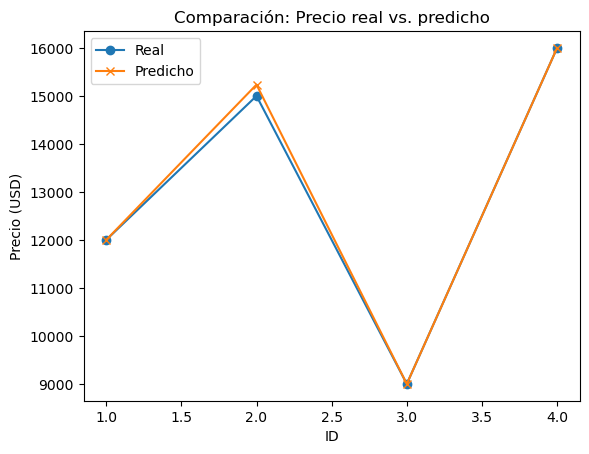

In [19]:
plt.figure(); plt.plot(df["ID"], y, marker="o", label="Real"); plt.plot(df["ID"], y_pred_full, marker="x", label="Predicho")
plt.xlabel("ID"); plt.ylabel("Precio (USD)"); plt.title("Comparación: Precio real vs. predicho"); plt.legend(); plt.show()

**Notas**

- Con 1 observación en prueba, R² no es interpretable; por eso se reporta **LOOCV R²** como referencia.
- Para mejorar: más datos, *feature engineering*, regularización (Ridge/Lasso), validación cruzada, análisis de residuos, polinomiales si hay no linealidad.